<h1>Kaggle: Bluebook for Bulldozers<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Descripción" data-toc-modified-id="Descripción-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Descripción</a></span></li><li><span><a href="#Carga-de-los-datos" data-toc-modified-id="Carga-de-los-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Carga de los datos</a></span></li><li><span><a href="#Análisis-exploratorio" data-toc-modified-id="Análisis-exploratorio-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Análisis exploratorio</a></span></li><li><span><a href="#Preprocesado-de-datos" data-toc-modified-id="Preprocesado-de-datos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preprocesado de datos</a></span><ul class="toc-item"><li><span><a href="#Categorías" data-toc-modified-id="Categorías-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Categorías</a></span></li><li><span><a href="#Fechas" data-toc-modified-id="Fechas-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fechas</a></span></li><li><span><a href="#Valores-NA,-etc" data-toc-modified-id="Valores-NA,-etc-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Valores NA, etc</a></span></li><li><span><a href="#Subconjuntos-de-entrenamiento-y-validación" data-toc-modified-id="Subconjuntos-de-entrenamiento-y-validación-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Subconjuntos de entrenamiento y validación</a></span></li></ul></li><li><span><a href="#Creación,-entrenamiento-y-evaluación-del-modelo" data-toc-modified-id="Creación,-entrenamiento-y-evaluación-del-modelo-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Creación, entrenamiento y evaluación del modelo</a></span></li><li><span><a href="#Reducción-del-sobreajuste" data-toc-modified-id="Reducción-del-sobreajuste-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Reducción del sobreajuste</a></span><ul class="toc-item"><li><span><a href="#Submuestreo" data-toc-modified-id="Submuestreo-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Submuestreo</a></span></li><li><span><a href="#Parámetros-del-modelo" data-toc-modified-id="Parámetros-del-modelo-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Parámetros del modelo</a></span></li></ul></li><li><span><a href="#Extra-Trees" data-toc-modified-id="Extra-Trees-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Extra Trees</a></span></li><li><span><a href="#Importancia-de-las-variables" data-toc-modified-id="Importancia-de-las-variables-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Importancia de las variables</a></span></li><li><span><a href="#One-hot-encoding" data-toc-modified-id="One-hot-encoding-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>One hot encoding</a></span></li><li><span><a href="#Eliminación-de-redundancia" data-toc-modified-id="Eliminación-de-redundancia-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Eliminación de redundancia</a></span></li><li><span><a href="#Dependencia-parcial" data-toc-modified-id="Dependencia-parcial-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Dependencia parcial</a></span></li><li><span><a href="#Extrapolación" data-toc-modified-id="Extrapolación-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Extrapolación</a></span></li></ul></div>

> Notebook para jugar con los datos de la competición de Kaggle [bluebook-for-bulldozers](https://www.kaggle.com/c/bluebook-for-bulldozers)

## Descripción

"El objetivo del concurso es predecir el precio de venta de una pieza particular de equipo pesado en una subasta, en función de su uso, tipo de equipo y configuración. Los datos provienen de publicaciones de resultados de la subasta e incluyen información sobre el uso y las configuraciones del equipo.

Fast Iron está creando un "libro azul para los bulldozers", con el fin de que los clientes valoren correctamente su flota de cara a una subasta."

* Descargas + Información completa sobre los datasets: https://www.kaggle.com/c/bluebook-for-bulldozers/data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, ExtraTreesRegressor
from IPython.display import display
from sklearn import metrics
import os

In [3]:
set_plot_sizes(12,14,16)

## Carga de los datos

Primero tendremos que descargar los datos desde la [web de Kaggle](https://www.kaggle.com/c/bluebook-for-bulldozers/data), y los dejamos en el subdirectorio /data.

A continuación volcamos la información del fichero en un dataframe de Pandas. Usaremos la función info para ver sus muestras (filas) y sus variables (columnas). De estas últimas obtendremos también el tipo y el número de valores que no son NaN.

In [4]:
df_raw = pd.read_csv(f'data/Train.csv', low_memory=False, 
                     parse_dates=["saledate"])  # use this for all columns with dates
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null int64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   69639 non-null object
saledate                    401125 non-null datetime64[ns]
fiModelDesc                 401125 non-null object
fiBaseModel                 401125 non-null object
fiSecondaryDesc             263934 non-null object
fiModelSeries               56908 non-null object
fiModelDescriptor           71919 non-null object
ProductSize                 190350 non-null object
fiProductClassDesc          401125 non-null object
state                

## Análisis exploratorio

Lo primero que haremos siempre después de cargar los datos será echar un primer vistazo a los mismos, para saber con qué estamos tratando. Creamos una función auxiliar (recubriendo a la función display de Python) para visualizar el contenido de un dataframe con un límite preestablecido de filas y columnas, y vemos una muestra de nuestro dataframe. Usamos T para transponer filas por columnas y visualizar mejor los datos en el notebook:

In [5]:
def display_all(df):
    with pd.option_context("display.max_rows", 100, "display.max_columns", 100): 
        display(df)

display_all(df_raw.head().T)

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


Nuestra variable dependiente, objetivo o valor a predecir será la columna 'SalePrice'. El resto son variables dependientes.

Echamos también un vistazo a los estadísticos básicos para todas las columnas, lo que nos dará un poco de información para conocer el contenido de los valores de las variables dependientes:

In [6]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaN,NaN,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaN,NaN,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaN,NaN,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaN,NaN,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaN,NaN,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaN,NaN,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaN,NaN,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaN,NaN,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17 00:00:00,2011-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


En este caso no vamos a hacer más análisis exploratorio, ya que no tiene mucho sentido si no pensamos quitar variables.

Vamos a guardar el dataframe en un fichero para no tener que volver a repetir la carga:

In [7]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')

In [8]:
df_raw = pd.read_feather('tmp/bulldozers-raw')

## Preprocesado de datos

Siempre es importante saber qué tipo de métrica se va a usar en un proyecto para la evaluación del modelo. En este caso Kaggle nos dice que evaluará usando RMSLE (Root Mean Squared Log Error), entre la predicción y el valor real de cada precio (columna SalePrice). Por ello usaremos el logaritmo del precio, y así el error RMSE nos dará directamente el RMLSE:

In [9]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

Para las columnas que contienen las variables dependientes observamos que tenemos una mezcla de datos numéricos, fechas y datos categóricos. 

### Categorías

Para las categorías lo que hacemos es convertir las columnas cuyos valores son strings al tipo category de Pandas. De tal forma que para Pandas ya es casi como si fueran variables numéricas, puesto que internamente asigna a cada string un código numérico.

Primeramente podemos echar un vistazo al número de valores únicos dentro de cada variable:

In [10]:
unique_counts = pd.DataFrame.from_records([(col, df_raw[col].nunique()) 
                                           for col in df_raw.columns  if df_raw[col].dtype == 'object'],
                                           columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
30,Coupler_System,2
19,Blade_Extension,2
22,Engine_Horsepower,2
13,Forks,2
24,Pushblock,2
26,Scarifier,2
16,Stick,2
18,Turbocharged,2
33,Track_Type,2
39,Backhoe_Mounting,2


Usamos la función `train_cats` para convertir todas las columnas del dataframe de tipo object a tipo category:

In [11]:
train_cats(df_raw)

In [12]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null float64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   69639 non-null category
saledate                    401125 non-null datetime64[ns]
fiModelDesc                 401125 non-null category
fiBaseModel                 401125 non-null category
fiSecondaryDesc             263934 non-null category
fiModelSeries               56908 non-null category
fiModelDescriptor           71919 non-null category
ProductSize                 190350 non-null category
fiProductClassDesc          401125 non-null category
sta

Además de nuestro objetivo hemos conseguido reducir el tamaño en memoria del dataframe a una cuarta parte del original!

Vemos un ejemplo de variable:

In [13]:
df_raw.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

Para la variable UsageBand observamos que tenemos unas categorías donde podría importar el orden:

In [14]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

Y como el orden es alfabético, esto podría influir de forma negativa a la hora de construir los árboles de decisión, puesto que lo natural es High > Medium > Low. Pero es algo que podemos cambiar:

In [15]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)
df_raw.UsageBand.cat.categories

Index(['High', 'Medium', 'Low'], dtype='object')

Este último cambio en el mapeo afectará a nuestro conjunto de entrenamiento. Obviamente queremos que el mapeo entre categorías y códigos sea igual para validación y test, para lo que fastai nos proporciona la función `apply_cats`, que ejecutada sobre dichos dataframes, aplicará el mismo mapeo que existía en entrenamiento.

In [16]:
?apply_cats

### Fechas

Siempre que tengamos una componente temporal lo primero que tendremos que preguntarnos es si deberíamos **ordenar el dataset**. Una razón fundamental para querer hacer esto es que nos interesa que el subconjunto de datos que usemos para validación esté por detrás del subconjunto de entrenamiento en el tiempo. De esta forma nuestro enfoque será el correcto.

In [17]:
df_raw.sort_values(by=['saledate'], inplace=True, ascending=True)
df_raw['saledate'].tail(70)

400366   2011-12-28
394047   2011-12-28
398516   2011-12-28
393939   2011-12-28
395489   2011-12-28
23967    2011-12-29
23972    2011-12-29
23971    2011-12-29
23968    2011-12-29
23970    2011-12-29
397660   2011-12-30
396721   2011-12-30
396548   2011-12-30
396547   2011-12-30
397589   2011-12-30
393789   2011-12-30
393238   2011-12-30
399026   2011-12-30
393458   2011-12-30
397551   2011-12-30
398326   2011-12-30
396535   2011-12-30
394916   2011-12-30
392389   2011-12-30
393098   2011-12-30
401026   2011-12-30
396330   2011-12-30
393732   2011-12-30
396339   2011-12-30
396346   2011-12-30
            ...    
398339   2011-12-30
400393   2011-12-30
400395   2011-12-30
400402   2011-12-30
400423   2011-12-30
400424   2011-12-30
400427   2011-12-30
400428   2011-12-30
400436   2011-12-30
400445   2011-12-30
400447   2011-12-30
400455   2011-12-30
394254   2011-12-30
400457   2011-12-30
400459   2011-12-30
396889   2011-12-30
394622   2011-12-30
398374   2011-12-30
400302   2011-12-30


Para los campos con fechas usamos `add_datepart`, que convertirá una columna de tipo datetime en varias numéricas. Lo aplicamos sobre la columna 'saledate', que ya es un datetime por la forma en que cargamos el CSV inicialmente :)

In [18]:
add_datepart(df_raw, 'saledate')

In [19]:
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


Vemos cómo se han añadido las columnas: 'saleYear', 'saleMonth', 'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',       'saleIs_month_end', 'saleIs_month_start', 'saleIs_quarter_end', 'saleIs_quarter_start', 'saleIs_year_end', 'saleIs_year_start', 'saleElapsed'.

### Valores NA, etc

Como hemos podido ver en nuestro primer análisis exploratorio, tenemos un montón de valores NA, que no podemos pasar al algoritmo Random Forests. Por suerte contamos con la función `proc_df` de fastai, que nos resuelve varias cuestiones:
 * Ajustar el mapeo entre categorías y números (mediante numericalize, que convierte -1 en 0, 0 en 1, etc) y quedarse únicamente con los valores numéricos.
 * Crear dummies (categorías con pocos valores posibles)
 * Manejar los missing values en columnas numéricas (fix_missing). No hace falta en las categóricas porque Pandas ya los tradujo a -1.
 * Separar la variable dependiente del resto

In [20]:
 proc_df??

In [21]:
df_x, df_y, nas = proc_df(df_raw, 'SalePrice')
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 400217
Data columns (total 66 columns):
SalesID                        401125 non-null int64
MachineID                      401125 non-null int64
ModelID                        401125 non-null int64
datasource                     401125 non-null int64
auctioneerID                   401125 non-null float64
YearMade                       401125 non-null int64
MachineHoursCurrentMeter       401125 non-null float64
UsageBand                      401125 non-null int8
fiModelDesc                    401125 non-null int16
fiBaseModel                    401125 non-null int16
fiSecondaryDesc                401125 non-null int16
fiModelSeries                  401125 non-null int8
fiModelDescriptor              401125 non-null int16
ProductSize                    401125 non-null int8
fiProductClassDesc             401125 non-null int8
state                          401125 non-null int8
ProductGroup                   401125

In [22]:
df_x.head().T

,205615,92803,98346,169297,274835
SalesID,1646770,1404019,1415646,1596358,1821514
MachineID,1126363,1169900,1262088,1433229,1194089
ModelID,8434,7110,3357,8247,10150
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1986,1975,1978,1980
MachineHoursCurrentMeter,0,0,0,0,0
UsageBand,0,0,0,0,0
fiModelDesc,4537,735,82,1158,1800
fiBaseModel,1735,243,19,349,557


### Subconjuntos de entrenamiento y validación

Kaggle nos proporciona los siguientes ficheros de datos:
 * Train.csv : datos hasta 2011. Usados para entrenar el modelo
 * Valid.csv : datos de los primeros 4 meses de 2012. Usados para validar el modelo -> Public LeaderBoard
 * Test.csv : datos desde mayo a noviembre de 2012. Usados para determinar el ranking final -> Private LeaderBoard
 
Lo que haríamos nosotros en esta competición de Kaggle para trabajar sería dividir Train.csv entre muestras de entrenamiento y validación (este es el único dataset para el que tenemos la variable target), y una vez tengamos nuestro modelo optimizado y listo, pasarlo sobre Valid.csv con el fin de crear las predicciones necesarias para el Public Leaderboard. Test.csv en este caso es lo mismo que Valid.csv pero para calcular la clasificación en el Private Leaderboard (la definitiva).

Usaremos una función para dividir las muestras de forma no aleatoria; las últimas serán las muestras de validación ya que tenemos una componente temporal (y el dataset ya está ordenado). De esta forma emularemos los datasets de test con muestras futuras.

In [23]:
def split_vals(a, n): 
    return a[:n].copy(), a[n:].copy()

n_valid = 12000  # las mismas muestras que los datasets de test
n_trn = len(df_x) - n_valid

X_train, X_valid = split_vals(df_x, n_trn)
y_train, y_valid = split_vals(df_y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

## Creación, entrenamiento y evaluación del modelo

Una vez pre-procesado el dataset, procedemos con el modelo. Primero creamos unas funciones auxiliares para calcular todas las medidas necesarias:

In [24]:
def rmse(predictions, actuals): 
    return math.sqrt(((predictions - actuals)**2).mean())

def print_score(m):
    print('RMSE for training:   ', rmse(m.predict(X_train), y_train))
    print('RMSE for validation: ', rmse(m.predict(X_valid), y_valid))
    print('R^2 for training:    ', m.score(X_train, y_train))
    print('R^2 for validation:  ', m.score(X_valid, y_valid))
    if hasattr(m, 'oob_score_'): 
        print('OoB score:           ', m.oob_score_)

A continuación instanciamos la clase adecuada con el nº de estimadores (árboles de decisión) por defecto, y paralelización de trabajos:

In [25]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=10)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 22.8 s
RMSE for training:    0.09085440425990393
RMSE for validation:  0.2553294480179077
R^2 for training:     0.9827897436147275
R^2 for validation:   0.8752765775627653


Parece que nuestro modelo tiene un problema de sobreajuste por la diferencia que observamos entre los resultados de entrenamiento y validación. Introducimos una característica de Random Forests para corroborarlo; el Out of Bag error, que mide el error de predicción en modelos basados en bagging (subimos el nº de estimadores para que sklearn pueda calcularlo sin problemas). Este error se usa en realidad cuando no tenemos suficientes datos como para crear un subconjunto de validación.

In [26]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=40, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 1min 21s
RMSE for training:    0.0783302000917301
RMSE for validation:  0.24596138204057624
R^2 for training:     0.9872075466478342
R^2 for validation:   0.8842609119549025
OoB score:            0.9087119191065419


La diferencia entre el R^2 de entrenamiento y el de validación nos lleva a pensar que hay sobreajuste. Además el OoB score está un poco por encima del R^2 score, lo que nos indica que podemos mejorar nuestro modelo (el OoB score debería ser menor que el R^2 score).

## Reducción del sobreajuste

Vamos a intentar solucionar el sobreajuste usando varias técnicas

### Submuestreo

El bagging de Random Forests lo que hace es, dado el dataset de entrenamiento, sustituir aleatoriamente el 36,8% de las filas por repeticiones de las restantes, dando lugar a un árbol de decisión único. Si usamos 40 estimadores, repetirá el proceso y generará 40 árboles de decisión distintos, con la idea de que estén lo menos correlados posible, de forma que al agregarlos el error medio tienda a cero.

Con el submuestreo lo que haremos es crear cada árbol usando una parte exclusiva y pequeña del dataset. Esto dará lugar a árboles más pequeños y más incorrelados, por lo que mejorará la velocidad y debería mejorar el resultado.

Fijamos el nº de muestras por árbol y ejecutamos RF de nuevo:

In [27]:
set_rf_samples(20000)

m = RandomForestRegressor(n_estimators=10, n_jobs=-1, oob_score=False)
m.fit(X_train, y_train)
print_score(m)

RMSE for training:    0.24082258003165646
RMSE for validation:  0.2792846225345013
R^2 for training:     0.8790823272698955
R^2 for validation:   0.850775457941514


Aumentamos el nº de árboles aprovechando que ahora somos más rápidos:

In [28]:
m = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=False)
m.fit(X_train, y_train)
print_score(m)

RMSE for training:    0.22424439654461167
RMSE for validation:  0.26391305959444195
R^2 for training:     0.8951572100425838
R^2 for validation:   0.8667497692053786


No parece que el sobreajuste haya mejorado mucho con esta técnica, pero lo de la velocidad es obvio!

### Parámetros del modelo

Vamos a intentar mejorar el modelo tocando sus parámetros. 

Una de las cosas que podemos hacer es limitar la profundidad del árbol con el parámetro `max_depth`, aunque existen formas más precisas...

Para empezar usaremos `min_samples_leaf` para forzar que tenga que haber un mínimo de muestras por hojas. De esta forma los árboles serán más simples y generalizarán mejor. Además la predicción en cada hoja se hará promediando más muestras, lo que resultará en una menor volatilidad.

Valores típicos del parámetro: 1, 3, 5, 10, 25, 100

In [29]:
reset_rf_samples()

In [30]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE for training:    0.11501899072006976
RMSE for validation:  0.24114981984741032
R^2 for training:     0.9724174461396775
R^2 for validation:   0.8887448585096029
OoB score:            0.90868017486239


Podemos aumentar la varianza entre los árboles usando sólo una parte (aleatoria) de las variables en cada decisión. Es trasladar el procedimiento realizado para las filas a las columnas. Usamos el parámetro `max_features`, que indica la proporción de features elegibles para cada división.

Valores típicos del parámetro: None, 0.5, 'log2', 'sqrt'

In [31]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE for training:    0.11904585128879433
RMSE for validation:  0.2336821749981019
R^2 for training:     0.9704522850916725
R^2 for validation:   0.8955286085430716
OoB score:            0.9120690463272515


Como podemos comprobar, nuestros resultados han mejorado notablemente. Si echamos un ojo a la clasificación de Kaggle para esta competición, nuestro RMSLE es bastante bueno. Bien es cierto que la validación para el Public Leaderboard se hizo con datos distintos, pero aún así nos podemos hacer una idea :)

## Extra Trees

Una alternativa al uso de Random Forests son los Extra Trees, que en lugar de crear las ramas probando todas las combinaciones para todas las variables, prueba de forma aleatoria unos cuantos valores de unas cuantas variables. Al ser más rápido será capaz de construir más árboles, generalizando mejor.

In [32]:
m = ExtraTreesRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, 
                        bootstrap=True, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE for training:    0.15415080161546652
RMSE for validation:  0.24789064676478442
R^2 for training:     0.9504564702218898
R^2 for validation:   0.882438129362195
OoB score:            0.8994045847978231


Podríamos mejorar los resultados tuneando los parámetros, o usando otros que no hemos tocado. Para ello lo mejor es recurrir a Grid Search; algo que veremos quizá en otra versión de este notebook :)

## Importancia de las variables

Podemos ver cuál es la importancia de cada una de las variables presentes en el dataset. Esto nos puede ayudar a reducir el número de columnas para generalizar mejor y crear un modelo más simple y rápido.

Nota: aquí trabajaremos mejor con una muestra del dataset...

In [33]:
set_rf_samples(50000)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE for training:    0.2060124853918182
RMSE for validation:  0.2519944285760989
R^2 for training:     0.9115123924257258
R^2 for validation:   0.8785134820086763
OoB score:            0.8945221777487729


In [34]:
fi = rf_feat_importance(m, X_train)
fi[:10] # Top 10

,cols,imp
5,YearMade,0.173427
13,ProductSize,0.112028
37,Coupler_System,0.097581
14,fiProductClassDesc,0.082677
38,Grouser_Tracks,0.058046
2,ModelID,0.051573
63,saleElapsed,0.051432
10,fiSecondaryDesc,0.046343
39,Hydraulics_Flow,0.037249
8,fiModelDesc,0.032438


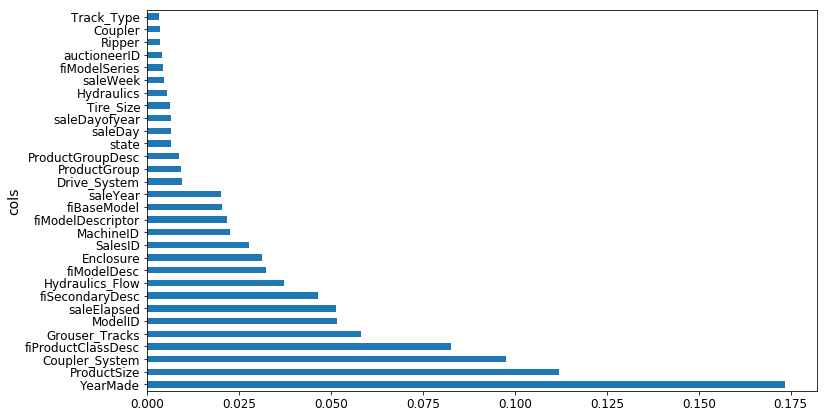

In [35]:
def plot_fi(fi): 
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

Algo interesante que podemos hacer en este punto es eliminar variables, para ver qué ocurre:

In [36]:
cols_to_keep = fi[fi.imp>0.005].cols
len(cols_to_keep)

24

Creamos de nuevo los subconjuntos de entrenamiento y validación sin las columnas menos importantes, entrenamos el modelo y a ver cómo se comporta...

In [37]:
df_x_keep = df_x[cols_to_keep].copy()
X_train, X_valid = split_vals(df_x_keep, n_trn)

In [38]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE for training:    0.20721819037937414
RMSE for validation:  0.2504040515566177
R^2 for training:     0.9104735995056589
R^2 for validation:   0.8800420846838952
OoB score:            0.8940013122664661


Los resultados son más o menos iguales... nos quedamos con este modelo, que es más simple!

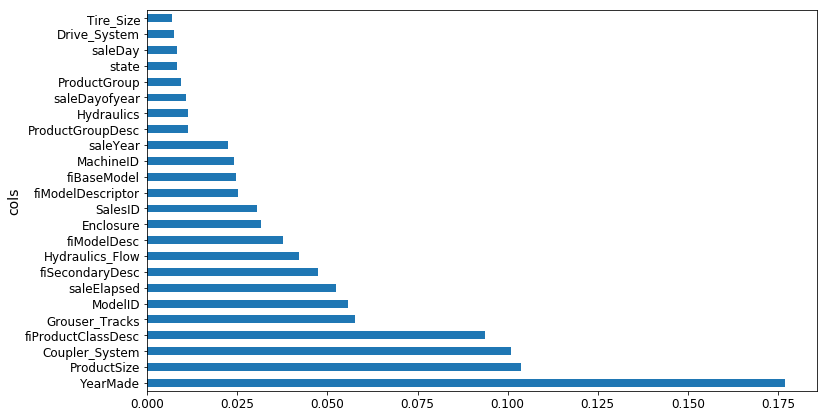

In [39]:
fi = rf_feat_importance(m, X_train)
plot_fi(fi);

La gráfica ha cambiado. Hemos reducido redundancia seguro.

## One hot encoding

Vamos a intentar dividir las columnas categóricas con pocos valores en nuevas columnas, para ver qué ocurre.

In [40]:
df_x_2, df_y, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_x_2, n_trn)

In [41]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE for training:    0.20736568695894922
RMSE for validation:  0.2539929821697097
R^2 for training:     0.9103461055111415
R^2 for validation:   0.8765788350849727
OoB score:            0.8926321980173831


En este caso el resultado es algo peor, pero hemos conseguido mejorar la interpretabilidad!

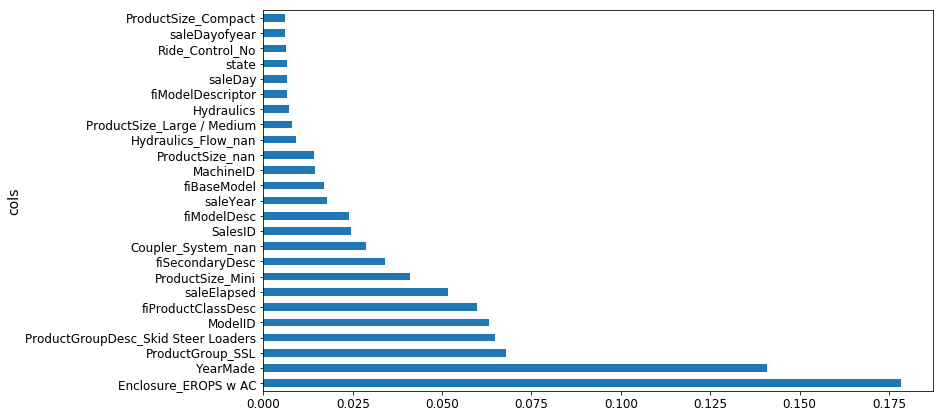

In [42]:
fi = rf_feat_importance(m, df_x_2)
plot_fi(fi[:25]);

## Eliminación de redundancia

Vamos a tratar de quitar redundancia, de tal forma que el modelo sea más simple y la importancia de las variables sea más real.

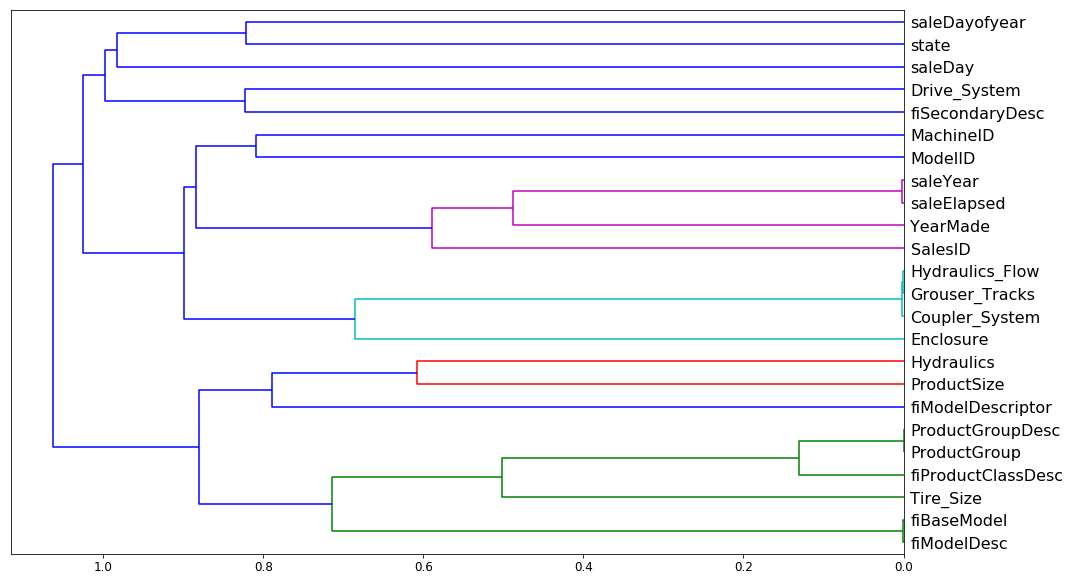

In [43]:
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(df_x_keep).correlation, 4) # correlation matrix
corr_condensed = hc.distance.squareform(1-corr)                  # distances matrix
z = hc.linkage(corr_condensed, method='average')                 # hierarchical/agglomerative clustering

fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_x_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

Existen varios pares de variables muy similares (las que se separan al borde de la derecha). Vamos a tratar de quitar una a una del modelo para ver cómo se ve afectado el OoB:

In [44]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [45]:
# Partimos de un OoB base
get_oob(df_x_keep)

0.8904372762188617

In [46]:
for c in ('saleYear', 'saleElapsed', 'fiModelDesc', 'fiBaseModel', 'Grouser_Tracks', 'Hydraulics_Flow'):
    print(c, get_oob(df_x_keep.drop(c, axis=1)))

saleYear 0.8902184992343339
saleElapsed 0.8875907605596834
fiModelDesc 0.8892725991656717
fiBaseModel 0.8896690935732343
Grouser_Tracks 0.8909130223456075
Hydraulics_Flow 0.890636549688388


Parece que podemos quitar una de cada par (la que su ausencia suba más el OoB score):

In [47]:
columns_to_drop = ['saleYear', 'fiModelDesc', 'Grouser_Tracks']
get_oob(df_x_keep.drop(columns_to_drop, axis=1))

0.888777904280977

El resultado es ligerísimamente peor, pero el modelo es más simple, así que nos quedamos con éste:

In [48]:
df_x_keep.drop(columns_to_drop, axis=1, inplace=True)
X_train, X_valid = split_vals(df_x_keep, n_trn)

Probamos el modelo con todo el dataset:

In [49]:
reset_rf_samples()

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE for training:    0.12583057404389184
RMSE for validation:  0.23786246750073514
R^2 for training:     0.9669883124547166
R^2 for validation:   0.8917574421678613
OoB score:            0.9087367412423072


## Dependencia parcial

Podemos intentar ver la relación entre variables. Por ejemplo:

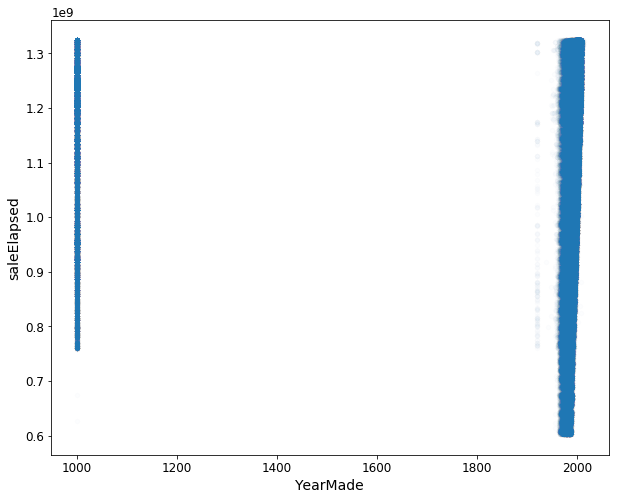

In [50]:
df_raw.plot('YearMade', 'saleElapsed', 'scatter', alpha=0.01, figsize=(10,8));

Vaya! igual podemos arreglarlo. Y también tiene sentido crear otra variable que sea la resta entre el año de venta y el de fabricación:

In [51]:
df_raw.YearMade[df_raw.YearMade < 1950] = 1950

df_x_keep['YearMade'] = df_raw['YearMade']
df_x_keep['age'] = df_raw['age'] = df_raw.saleYear - df_raw.YearMade

C:\Users\Yago\.conda\envs\fastai\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
X_train, X_valid = split_vals(df_x_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1)
m.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

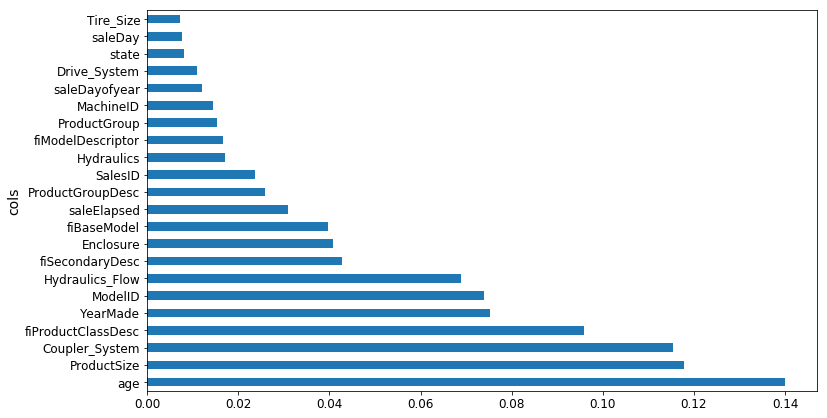

In [53]:
plot_fi(rf_feat_importance(m, df_x_keep));

## Extrapolación

Cuando tenemos una componente temporal nos gustaría poder extrapolar la variable objetivo al futuro, pero no podemos hacer eso en RF. Lo que podemos hacer es eliminar las variables que tienen más componente temporal, para así ajustar más el precio de venta (si quitamos la componente temporal de entrenamiento, obtendremos mejores resultados después).

Vamos a añadir una nueva columna sencilla, que valga 1 si la muestra pertenece al subconjunto de validación y crearemos un modelo RF para intentar predecir el valor de la misma para cada muestra:

In [54]:
df_ext = df_x_keep.copy()
df_ext['is_valid'] = 1
df_ext.is_valid[:n_trn] = 0
x_ext, y_ext, nas = proc_df(df_ext, 'is_valid')

C:\Users\Yago\.conda\envs\fastai\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x_ext, y_ext);
m.oob_score_

0.9999700841383609

Bien, podemos predecirlo (esto implica que el subconjunto de validación no es aleatorio).

Ahora vemos las variables más importantes (como el subconjunto de validación es el final del dataset ordenado, las variables más importantes serán las que están relacionadas con la componente temporal):

In [56]:
fi = rf_feat_importance(m, x_ext); fi[:10]

,cols,imp
5,saleElapsed,0.826389
9,SalesID,0.071264
10,MachineID,0.068241
18,saleDayofyear,0.028001
21,age,0.002386
17,saleDay,0.001882
8,Enclosure,0.000670
0,YearMade,0.000520
4,ModelID,0.000402
2,Coupler_System,0.000050


Nos quedamos con las top, y comparamos sus estadísticos para ambos subconjuntos de muestras:

In [57]:
feats=['saleElapsed', 'SalesID', 'saleDayofyear', 'MachineID']

In [58]:
(X_train[feats]/1000).describe()

,saleElapsed,SalesID,saleDayofyear,MachineID
count,3.891250e+05,389125.000000,389125.000000,389125.000000
mean,1.084389e+06,1829.352227,0.176220,1205.539980
std,1.799262e+05,688.683996,0.102636,426.910622
min,6.009984e+05,1139.246000,0.002000,0.000000
25%,9.666432e+05,1416.619000,0.083000,1089.252000
50%,1.134605e+06,1634.496000,0.165000,1274.977000
75%,1.234138e+06,2220.152000,0.268000,1458.609000
max,1.313712e+06,6333.281000,0.365000,2386.738000


In [59]:
(X_valid[feats]/1000).describe()

,saleElapsed,SalesID,saleDayofyear,MachineID
count,1.200000e+04,12000.000000,12000.000000,12000.000000
mean,1.319832e+06,4849.833320,0.301833,1618.783561
std,3.448105e+03,1841.642914,0.039909,652.031790
min,1.313712e+06,1140.212000,0.231000,0.830000
25%,1.316736e+06,4277.997750,0.266000,1053.993250
50%,1.319674e+06,6258.986500,0.300000,1847.404000
75%,1.323302e+06,6285.309250,0.342000,2270.156000
max,1.325203e+06,6333.342000,0.364000,2486.330000


Mirando basicamente la media podemos concluir que las variables podrían eliminarse. Probamos...

In [60]:
x_ext.drop(feats, axis=1, inplace=True)
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x_ext, y_ext);
m.oob_score_

0.9819781863508882

In [61]:
fi = rf_feat_importance(m, x_ext); fi[:10]

,cols,imp
17,age,0.233939
0,YearMade,0.172595
14,saleDay,0.156194
13,state,0.133011
4,ModelID,0.072985
9,fiBaseModel,0.062838
3,fiProductClassDesc,0.042382
5,fiSecondaryDesc,0.030263
7,Enclosure,0.019158
8,fiModelDescriptor,0.014401


Lo intentamos otra vez con las de antes y con estas...

In [62]:
set_rf_samples(50000)

feats=['saleElapsed', 'SalesID', 'saleDayofyear', 'MachineID', 'age', 'YearMade', 'saleDay', 'state']

Para tener una base con la que comparar...

In [63]:
X_train, X_valid = split_vals(df_x_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE for training:    0.20789538910275887
RMSE for validation:  0.255473446228367
R^2 for training:     0.9098874904366175
R^2 for validation:   0.8751358572955862
OoB score:            0.8934077912523709


Probamos a generar el modelo eliminando una de las variables, para cada una de las elegidas...

In [64]:
for f in feats:
    df_subs = df_x_keep.drop(f, axis=1)
    X_train, X_valid = split_vals(df_subs, n_trn)
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print(f)
    print_score(m)

saleElapsed
RMSE for training:    0.21440809816007841
RMSE for validation:  0.26380764869082596
R^2 for training:     0.904153173204476
R^2 for validation:   0.866856192299089
OoB score:            0.8872161000114371
SalesID
RMSE for training:    0.20970209813072474
RMSE for validation:  0.25490190483500147
R^2 for training:     0.9083144442958668
R^2 for validation:   0.8756939207559395
OoB score:            0.8921628909616628
saleDayofyear
RMSE for training:    0.2093800654575815
RMSE for validation:  0.24935332017339318
R^2 for training:     0.9085958251117335
R^2 for validation:   0.8810466938113485
OoB score:            0.892546772275675
MachineID
RMSE for training:    0.20717099540003187
RMSE for validation:  0.2528302473850648
R^2 for training:     0.9105143750327431
R^2 for validation:   0.8777062489820144
OoB score:            0.8948852211649171
age
RMSE for training:    0.21000086320757833
RMSE for validation:  0.2527250904911209
R^2 for training:     0.9080530071857005
R^2 f

Eliminamos las que supusieran un aumento de R^2!

In [65]:
reset_rf_samples()

In [66]:
df_subs = df_x_keep.drop(['saleDayofyear', 'age', 'saleDay', 'MachineID'], axis=1)
X_train, X_valid = split_vals(df_subs, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

RMSE for training:    0.1368439959023233
RMSE for validation:  0.2341683556767776
R^2 for training:     0.9609566688141326
R^2 for validation:   0.8950934464783227
OoB score:            0.91006904344835


El resultado ha mejorado, pero en teoría el R^2 de validación debería ser mayor que el OoB, por lo que todavía existe margen de mejora.